# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Wednesday, 25.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice between two projects. This one has a scientific focus. In the other one, you can program a game and its focus is on elements of the `Python`-language and on programming techniques. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 2](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Wednesday, 25.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data_2022.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2021 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

### Name: Ajay Shanmuga Sakthivasan

**Notes:**  
The cells marked `#EXTRA` do not add to the solutions but offer additional insights to the problem.

In [1]:
#modules required for the notebook
import glob #pathname pattern matching
import os #path manipulation
import numpy as np
import matplotlib.pyplot as plt

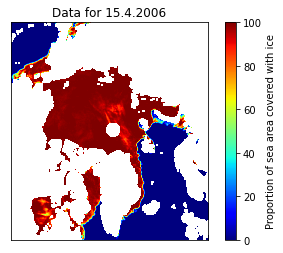

<Figure size 720x720 with 0 Axes>

In [2]:
#task 1
pathstring1 = "/home/shared/Project_2/ice_data/20060415.npy" #change file path here for a different plot
#data for April 15, 2006 is taken as an example

data = np.load(pathstring1) #load the data onto an array
filename = os.path.basename(pathstring1) #get the filename from the path
year = int(filename[0:4]) #extract year from file name
month = int(filename[4:6]) #extract month from file name
date = int(filename[6:8]) #extract date from file name
#extracting year, month and date from the path can also be done with the help of RegEx.
#a typical approach would be to split the path at '/' and further split the
#string corresponding to year, month and date and such a method would be unnecessarily long.
#It is my opinion that os.path offers a more elegant solution in this case.

#plotting
plt.imshow(data, origin = 'lower', cmap = plt.cm.jet) #imshow with jet cmap
plt.colorbar(label = 'Proportion of sea area covered with ice', orientation = 'vertical') #add colourbar
plt.xticks([]) #remove xticks
plt.yticks([]) #remove yticks
plt.title(f'Data for {date}.{month}.{year}') #add plot title
plt.figure(figsize = (10,10)) #set fig size
plt.show() #print plot

**Remarks:**  
This task was straightforward. We just load a data and plot it using `imshow` with specific attributes. We can also see the outline of landmass - the Canadian, Russian and the Scandinavian coast, Greenland, Iceland and Great Britain. Neat! Interestingly, the middle pixel is filled with `NaN` here and this was the case with all the files that we tested. We do not have a reason for this anomalous point. Also, note that to plot a different data, just change the _pathstring1_ value to the path of the required data.

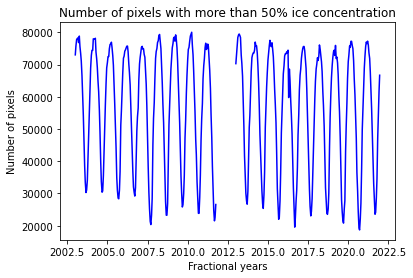

In [3]:
#task 2
pathstring2 = "/home/shared/Project_2/ice_data/*.npy" #change search pattern here for different results
#we have used the entire set of data

fiftyplus = np.zeros(len(glob.glob(pathstring2))) #initialise a zero matrix the size of the number of data files to store the desired result
times = np.copy(fiftyplus) #initialise a zero matrix the size of the number of data files to store fractional years

flag = 0 #use a separate index variable since we are using path in the list of paths as our loop control variable
for file in sorted(glob.glob(pathstring2)): #iterate over all file paths matching the search pattern
    #use sorted to sort since the return values of glob are arbitrary
    data_fiftyplus = np.load(file) #load the file onto an array
    filename = os.path.basename(file) #get the file name
    year = int(filename[0:4]) #extract year, which is just the first four characters of the file name
    month = int(filename[4:6]) #extract month, which is the fifth and sixth character of the file name
    date = int(filename[6:8]) #extract date, which is the seventh and eighth character of the file name
    #the reason for using os.path is explained in the previous cell
    times[flag] = year + (month - 1)/12 + (date - 1)/360 #update the times array with fractional year
    fiftyplus[flag] = len(data_fiftyplus[(data_fiftyplus>50)]) #update the number of pixels with values more than 50
    flag += 1 #update index variable

#plotting
plt.plot(times[times < 2012], fiftyplus[times < 2012], color = 'blue') #plot for times before 2012
plt.plot(times[times > 2012], fiftyplus[times > 2012], color = 'blue') #plot for times after 2012
#we don't have any data for the year 2012. therefore, we plot for the times before and after 2012 separately
#if this is not done, we will have a straightline that connects the last data of the year 2011 to the first data of the year 2013 in the plot
#this happens because line plot is the default plot mode of matplotlib.
#one workaround will be to use a scatter plot instead, since we have discrete data points anyway
#but this doesn't show the trend as clearly as before and we would prefer to have that since the variable is continuous in real life.
plt.title('Number of pixels with more than 50% ice concentration') #add plot title
plt.xlabel('Fractional years') #add x-label
plt.ylabel('Number of pixels') #add y-label
plt.show() #print plot

**Remarks:**  
We should expect some kind of an oscillating behaviour when we plot the ice concentration over the years. This expectation is met here in this plot. The peaks correspond to the winters and the troughs correspond to the summers. We can already notice that the ice concentrations in this case (50% or more) has been consistently decreasing over the years.

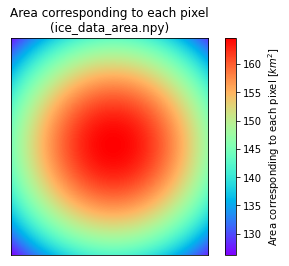

<Figure size 720x720 with 0 Axes>

In [4]:
area = np.load("/home/shared/Project_2/ice_data_area.npy") #load the area data onto an array

#plotting
plt.imshow(area, origin="lower", cmap = plt.cm.rainbow) #imshow with rainbow cmap 
plt.colorbar(label = 'Area corresponding to each pixel [$km^2$]', orientation = "vertical") #add colourbar
plt.xticks([]) #remove xticks
plt.yticks([]) #remove yticks
plt.title('Area corresponding to each pixel\n(ice_data_area.npy)') #add plot title
plt.figure(figsize=(10,10)) #set fig size
plt.show() #print plot

**Remarks:**  
We notice that the middle pixel corresponds to the maximum area a whereas the pixels that lie the farthest from the middle correspond to the minimum area. Again, this is expected. We take a (part of a) spherical surface and project it on to a plane (in this case, with the north pole as the centre). Therefore, the outermost points of the surface should get stretched out on the plane, corresponding to smaller areas on the surface (think of stretching a cloth over a plane - the more it is stretched at point on the plane, smaller the corresponding area is, on the cloth). Since this is a projection of a (part of a) spherical surface, the points at a constant radius should all correspond to the same area, which holds here.

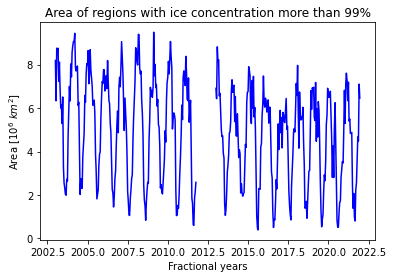

In [5]:
#we use only one times array (fractional years array) for the entire notebook, which is initialised in the first cell of task 2
#changing the date range in that cell changes the plots here and afterwards (this can be done by changing the variable, "pathstring2")
#this is useful if we are interested in exploring the plots for other date ranges
ninenineplus = np.zeros(len(glob.glob(pathstring2))) #initialise a zero matrix the size of the number of data files to store the desired result

#comments are ditto from the first cell of task 2, unless stated otherwise
flag = 0
for file in sorted(glob.glob(pathstring2)):
    data = np.load(file)
    #update the array with the values of total area of pixels with more than 99% concentration
    ninenineplus[flag] = np.sum(data[(data >= 99)] * area[(data >= 99)]/100) #multiply conc. of every pixel with its corresponding area value and sum
    #divide by hundred because the concentration is given in percentage
    #we do not need nansum here. we don't have any nan values because we are slicing the array in such a way
    flag += 1

#plotting
plt.plot(times[times < 2012], ninenineplus[times < 2012]/1e6, color='blue') #plot for times before 2012
plt.plot(times[times > 2012], ninenineplus[times > 2012]/1e6, color='blue') #plot for times after 2012
#notice that we have divided the y-values by 1e6
#this means that the area in the plot in million km^2
plt.title('Area of regions with ice concentration more than 99%') #add plot title
plt.xlabel('Fractional years') #add x-label
plt.ylabel('Area [$10^6~km^2$]') #add y-label - area is in million km^2
plt.show() #print plot

Just like the previous plot, this case (concentration more than 99%) shows a similar worrying trend of decrease. We also note that in this case, even the maximum shows a decrease over years. This means that the areas with more than 99% ice concentration is not as much as it used to be. 

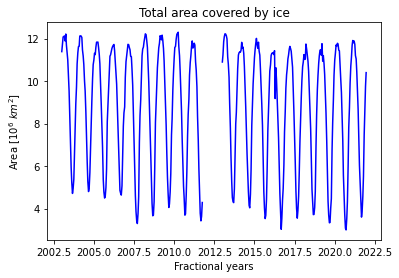

In [6]:
zeroplus = np.zeros(len(glob.glob(pathstring2))) #initialise a zero matrix the size of the number of data files to store the desired result

#comments are ditto from the first cell of task 2, unless stated otherwise
flag = 0
for file in sorted(glob.glob(pathstring2)):
    data = np.load(file)
    #update the array with the values of total area of pixels with more than 0% concentration
    #this is same as finding the total area of regions with any ice
    zeroplus[flag] = np.sum(data[(data > 0)] * area[(data > 0)]/100) #multiply conc. of every pixel with its corresponding area value and sum
    #divide by hundred because the concentration is given in percentage
    #we do not need nansum here. we don't have any nan values because we are slicing the array in such a way
    flag += 1

#plotting
plt.plot(times[times < 2012], zeroplus[times < 2012]/1e6, color='blue') #plot for times before 2012
plt.plot(times[times > 2012], zeroplus[times > 2012]/1e6, color='blue') #plot for times after 2012
#notice that we have divided the y-values by 1e6
#this means that the area in the plot in million km^2
plt.title('Total area covered by ice') #add plot title
plt.xlabel('Fractional years') #add x-label
plt.ylabel('Area [$10^6~km^2$]') #add y-label - area is in million km^2
plt.show() #print plot

**Remarks:** 
This plot, just like the first plot shows a decreasing trend at the minimum, but not much at the maximum. Playing around with the data a little, we noticed that the plot for area where ice concentration is more than 50% is almost the same as the plot above (more than 0%). This means that there are only a small number of points at lower concentrations and it increases and explodes closer to 100% concentration - a sort of an exponential curve for the number of points vs. concentration. This is interesting, but meaningful. A lot of ice is concentrated more around the pole and this region has a much higher concentration of ice. The regions away from the pole are only sparingly populated with ice. The arctic, unlike Antarctica is not a continental landmass and such a distribution makes sense.  
As a consistency check, we just calculate the total area of water+ice below. We should expect it to be roughly constant. Even though small areas of land might recede or grow depending on the season, there shouldn't be a huge change. Land cannot magically appear out of nowhere. We check this below (we do not multiply ice concentration here - because the condition >= 0 ignores the landmass but includes all of sea+ice area and multiplying this with  ice concentration is same as calculating the total area covered with ice).

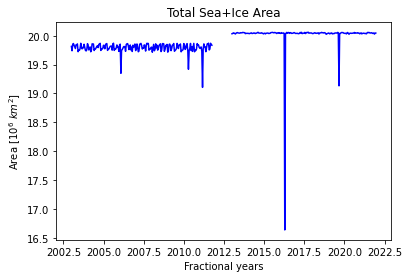

In [7]:
#EXTRA
#as a consistency check, we see if the total sea+ice area is roughly constant

seaarea = np.zeros(len(glob.glob(pathstring2))) #initialise a zero matrix the size of the number of data files to store the desired result

#comments are ditto from the first cell of task 2, unless stated otherwise
flag = 0
for file in sorted(glob.glob(pathstring2)):
    data = np.load(file)
    
    seaarea[flag] = np.sum(area[(data >= 0)]) #multiply conc. of every pixel with its corresponding area value and sum
    #divide by hundred because the concentration is given in percentage
    #we do not need nansum here. we don't have any nan values because we are slicing the array in such a way
    flag += 1

#plotting
plt.plot(times[times < 2012], seaarea[times < 2012]/1e6, color='blue') #plot for times before 2012
plt.plot(times[times > 2012], seaarea[times > 2012]/1e6, color='blue') #plot for times after 2012
#notice that we have divided the y-values by 1e6
#this means that the area in the plot in million km^2
plt.title('Total Sea+Ice Area') #add plot title
plt.xlabel('Fractional years') #add x-label
plt.ylabel('Area [$10^6~km^2$]') #add y-label - area is in million km^2
plt.show() #print plot

**Remarks:**:  
As expected, the sea+ice area is roughly the same over the entire data. But for some reason there is one anomalous point. Eureka! We've discovered a bad data file. We plot this below and we notice that there is a large chunk of `NaN`s where there is supposed be none! Funnily, we stumbled upon this after trying to calculate the area covered by ice incorrectly (as mentioned earlier, we calculated the area without multiplying the ice concentration values).

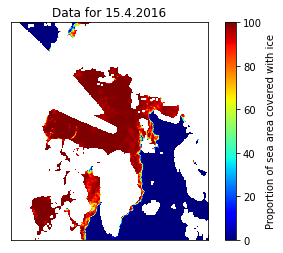

<Figure size 720x720 with 0 Axes>

In [8]:
#EXTRA
pathstringextra = "/home/shared/Project_2/ice_data/20160415.npy" #change file path here for a different plot
#data for April 15, 2006 is taken as an example

data = np.load(pathstringextra) #load the data onto an array
filename = os.path.basename(pathstringextra) #get the filename from the path
year = int(filename[0:4]) #extract year from file name
month = int(filename[4:6]) #extract month from file name
date = int(filename[6:8]) #extract date from file name
#extracting year, month and date from the path can also be done with the help of RegEx.
#a typical approach would be to split the path at '/' and further split the
#string corresponding to year, month and date and such a method would be unnecessarily long.
#It is my opinion that os.path offers a more elegant solution in this case.

#plotting
plt.imshow(data, origin = 'lower', cmap = plt.cm.jet) #imshow with jet cmap
plt.colorbar(label = 'Proportion of sea area covered with ice', orientation = 'vertical') #add colourbar
plt.xticks([]) #remove xticks
plt.yticks([]) #remove yticks
plt.title(f'Data for {date}.{month}.{year}') #add plot title
plt.figure(figsize = (10,10)) #set fig size
plt.show() #print plot

In [9]:
#task3
#note that we are still working with times and zeroplus from task2
#changing the date range there changes our results here (but it'll all still work consistently)
minindex = np.argmin(zeroplus) #find the data corresponding to least area covered with ice
mindate = times[minindex] #find the fractional date corresponding to least area

print('Fractional date: ', mindate) #print fractional date

#now we would like to convert fractional date back to human readable date
yearval = int(np.floor(mindate)) #year is the floor of fractional date
daysval = (mindate - yearval)*360 + 1 #every day corresponds to 1/360 in the fractional date => multiply by 360 to get the total days
monthval = int(np.floor(daysval/30) + 1) #month is the floor of days divided by 30 (add 1 since January corresponds to 0 here)
#now extracting the date is the difficult part here, because of how python handles floating values
#we make use of the fact that we have readings only on the first and fifteenth of every month
dateval = 15 * round(daysval/15) #we first round the date value to the nearest 15 => now dates will be 0, 15, 30, 45, 60, 75, ..., 345
if dateval%30 == 0: dateval = dateval%30 + 1 #the above step means dates corresponding to first of a month will be a multiple of 30, so we add 1
else: dateval = dateval%30 #the dates corresponding to fifteenth of a month will be an odd multiple of 15, so we don't have to do anything here
print('Human readable date: ', dateval, '.', monthval, '.', yearval)
#note that the above was done only to make this code more general
#we could've converted the fractional date to normal date for the specific mindate here
#but this means we have to modify the code if we add more data in the future (or if we change the date range in the first cell of task2)
#the above implementation means that this code will work as long as we have readings only from the first and fifteenth of a month
#the code might seem complicated, but it is straightforward and is not inefficient

minarea = zeroplus[minindex] #find out the minimum area of regions covered with ice
print("Least area of regions covered with ice: ", round(minarea, 2), "km^2") #round minimum area to 2 decimals for readability

Fractional date:  2020.7055555555555
Human readable date:  15 . 9 . 2020
Least area of regions covered with ice:  2995844.31 km^2


**Remarks:**  
The minimum area recorded is in 2020, as mentioned in the problem statement.

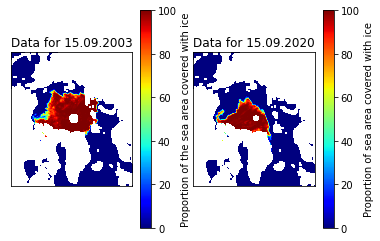

<Figure size 720x720 with 0 Axes>

In [10]:
#load the data corresponding to the same day as minarea date but from 2003 onto an array
mindata = np.load('/home/shared/Project_2/ice_data/20200915.npy')
#load the data corresponding to the minarea date onto an array
mindatabut2003 = np.load('/home/shared/Project_2/ice_data/20030915.npy')

#plotting
plt.subplot(1, 2, 1) #first subplot of a plot with 2 columns and 1 row
plt.imshow(mindatabut2003, origin="lower", cmap = plt.cm.jet) #imshow with jet cmap
plt.colorbar(label="Proportion of the sea area covered with ice", orientation="vertical") #add colourbar
plt.xticks([]) #remove x-ticks
plt.yticks([]) #remove y-ticks
plt.title('Data for 15.09.2003') #add plot title

plt.subplot(1, 2, 2) #second subplot of a plot with 2 columns and 1 row
plt.imshow(mindata, origin="lower", cmap = plt.cm.jet) #imshow with jet cmap
plt.colorbar(label="Proportion of sea area covered with ice", orientation="vertical") #add colourbar
plt.xticks([]) #remove x-ticks
plt.yticks([]) #remove y-ticks
plt.title('Data for 15.09.2020') #add plot title

plt.figure(figsize = (10,10)) #set figsize
plt.show() #print the plot

**Remarks:**  
We can clearly notice the loss of area covered by ice in the above map. There are large chunks of regions covered with ice along the Russian coast in 2003, but this is not the case in 2020.

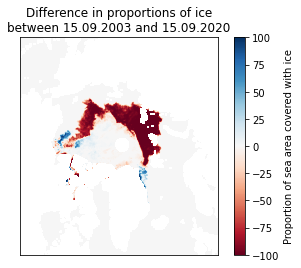

In [11]:
mindatadiff = mindata - mindatabut2003 #the difference between the two maps from the previous cell

#plotting
plt.imshow(mindatadiff, origin = 'lower', cmap = plt.cm.RdBu) #imshow with RdBu cmap
plt.colorbar(label = 'Proportion of sea area covered with ice', orientation = 'vertical') #add colourbar
plt.xticks([]) #remove x-ticks
plt.yticks([]) #remove y-ticks
plt.title('Difference in proportions of ice\nbetween 15.09.2003 and 15.09.2020') #add plot title
plt.show() #print plot title

**Remarks:**  
The above plot just proves our statement from the previous cell. There is almost close to 100% loss of proportion of ice close to the Russian coast. There are a few points with smaller gains but this is not much and probably just a fluctuation.  
The above map is nice, but we cannot clearly differentiate the landmass from the water. In the plot below, we just plot all `NaN`s in black, so that we can see the loss of proportion of ice better.

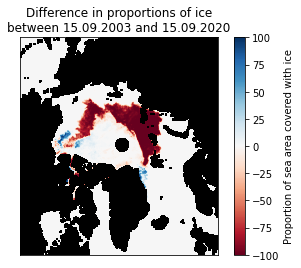

In [12]:
#EXTRA
masked_mindatadiff = np.ma.array(mindatadiff, mask = np.isnan(mindatadiff)) #create a masked array with nan values as mask

cmap = plt.cm.RdBu.copy() #set cmap to RdBU
cmap.set_bad('black', 1.) #set mask values to black
plt.imshow(masked_mindatadiff, origin = 'lower', cmap = cmap) #imshow of the masked array
plt.colorbar(label = 'Proportion of sea area covered with ice', orientation = 'vertical') #add colourbar
plt.xticks([]) #remove x-ticks
plt.yticks([]) #remove y-ticks
plt.title('Difference in proportions of ice\nbetween 15.09.2003 and 15.09.2020') #add plot title
plt.show() #print the plot

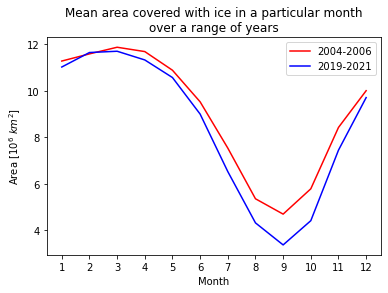

In [13]:
#we are going to calculate the values for every month, therefore we create arrays of size 12
iceconc_data1 = np.zeros(12) #array to store the total area covered by ice for a particular month for the first set of data
timesconc_data1 = np.zeros(12) #array to store the number of data files for a particular month for the first set of data
iceconc_data2 = np.zeros(12) #array to store the total area covered by ice for a particular month for the second set of data
timesconc_data2 = np.zeros(12) #array to store the number of data files for a particular month for the second set of data
#these arrays will be manipulated in such a way that the first element will contain
#the total value corresponding to Januaries over all the years in the range and so on for the other elements

for file in sorted(glob.glob("/home/shared/Project_2/ice_data/200[4-6]*.npy")): #iterate over the files for 2004-2006
    data1 = np.load(file)
    filename = os.path.basename(file)
    month = int(filename[4:6])
    #use month as the index variable
    iceconc_data1[month - 1] += np.sum(data1[(data1> 0)] * area[(data1> 0)]/100) #sum a month's area to the corresponding element
    #this way we get the sum of all areas for a particular month over the date range
    timesconc_data1[month - 1] += 1 #store the number of files for a specific month

#iterate over the files for 2019-2021. we need two separate globs to do this
for file in sorted(glob.glob("/home/shared/Project_2/ice_data/2019*.npy") + glob.glob("/home/shared/Project_2/ice_data/202[0-1]*.npy")):
    data2 = np.load(file)
    filename = os.path.basename(file)
    month = int(filename[4:6])
    #comments are ditto from the previous loop
    iceconc_data2[month - 1] += np.sum(data2[(data2> 0)] * area[(data2> 0)]/100)
    timesconc_data2[month - 1] += 1

#mean area for every month is just total area divided by the number of available files for that particular month
meanarea_data1 = iceconc_data1/timesconc_data1 #mean area for every month for the first set of data
meanarea_data2 = iceconc_data2/timesconc_data2 #mean area for every month for the second set of data

#plotting
plt.plot(np.arange(1, 13, 1), meanarea_data1/1e6, color = 'red', label = '2004-2006') #plot for the first set of data 
plt.plot(np.arange(1, 13, 1), meanarea_data2/1e6, color = 'blue', label = '2019-2021') #plot for the second set of data
plt.xticks(np.arange(1, 13, 1)) #print all the months on the x-axis (1 corresponds to January)
plt.legend(loc = 'upper right') #print labels
plt.xlabel('Month') #add x-label
plt.ylabel('Area [$10^6~km^2$]') #add y-label (area is in million km^2)
plt.title('Mean area covered with ice in a particular month\nover a range of years') #add plot title
plt.show() #print the plot

**Remarks:**  
We call this as the mean area covered in a particular month instead of mean ice concentration (as mentioned in the problem statement), since mean area is what we are plotting.  
We can clearly see that at the minimum value, the mean area covered with ice for 2019-2021 has decreased to almost two-thirds of the value for 2004-2006. 

In [14]:
arealoss = min(meanarea_data2) - min(meanarea_data1) #total ice area lost at the minimum value
print("Total ice area lost: ", round(arealoss, 2), "km^2")

rate = arealoss/15 #calculate the area loss per year
print("Estimated years before an ice-free month: ", round(-1*min(meanarea_data2)/rate), "years")

Total ice area lost:  -1324088.7 km^2
Estimated years before an ice-free month:  38 years


**Remarks:**  
We estimate that, at this rate and assuming a linear behaviour, there will be an ice-free month in the year of 2058. Note that we are calculating the mean over three years. This means that we might face an ice-free month earlier. Or even, we might face ice-free days much more earlier. This is, of course, assuming a linear trend. We hope we act now to reverse this :'(